# BREAST CANCER ANALYSIS

This project applies logistic regression to classify breast cancer tumors as malignant or benign using the Breast Cancer dataset from Kaggle. 

It includes data preprocessing, model training, evaluation with accuracy and confusion matrix, and visualization of results. Ideal for beginners exploring binary classification in machine learning.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
data = r'C:\Users\Jessica Grant\Desktop\Breast Cancer Dataset\Breast_Cancer_Project\breast_cancer.csv'
df = pd.read_csv(data)

In [ ]:
# Preview the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Exploratory Data Analysis

In [ ]:
# Check for missing values
df.isnull()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
678,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
# View dimensions of the dataset
df.shape

(683, 10)

In [ ]:
# Round dataset description to 2 decimal places
round(df.describe(),2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00
mean,4.44,3.15,3.22,2.83,3.23,3.54,3.45,2.87,1.60,2.70
std,2.82,3.07,2.99,2.86,2.22,3.64,2.45,3.05,1.73,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


In [ ]:
# Check for missing values
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Box Plot to Visualize Outliners

Text(0, 0.5, 'Marginal Adhesion')

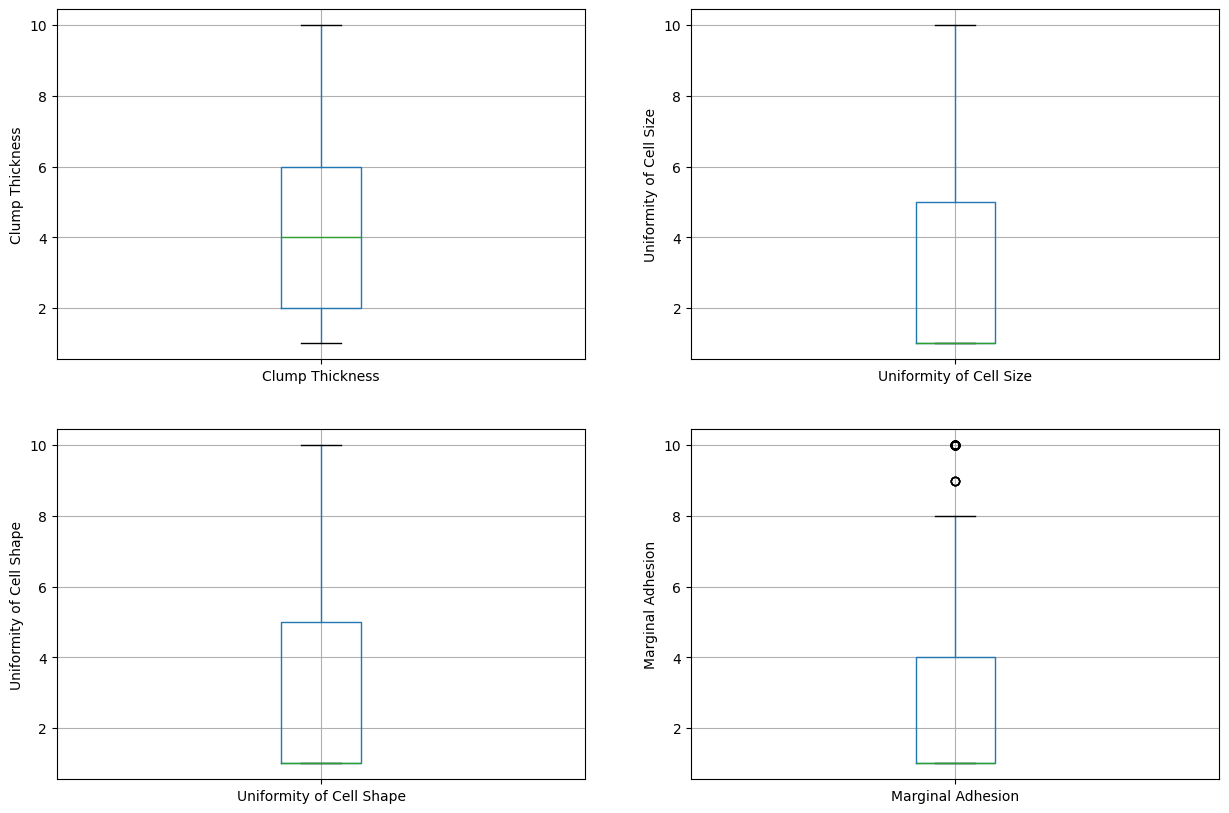

In [9]:
plt.figure(figsize = (15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column ='Clump Thickness')
fig.set_title('')
fig.set_ylabel('Clump Thickness')

plt.subplot(2, 2, 2)
fig = df.boxplot(column ='Uniformity of Cell Size')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Size')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Uniformity of Cell Shape')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Shape')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Marginal Adhesion')
fig.set_title('')
fig.set_ylabel('Marginal Adhesion')

Text(0, 0.5, 'Class')

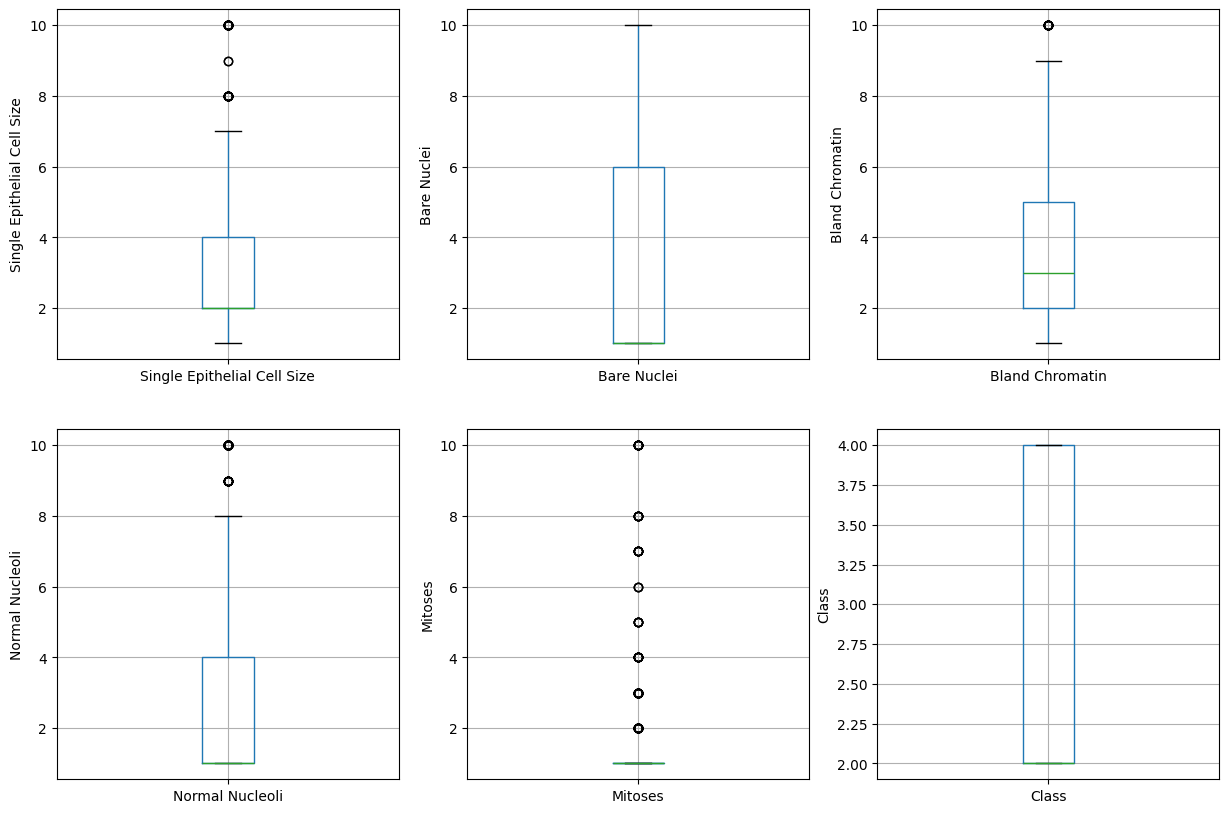

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='Single Epithelial Cell Size')
fig.set_title('')
fig.set_ylabel('Single Epithelial Cell Size')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='Bare Nuclei')
fig.set_title('')
fig.set_ylabel('Bare Nuclei')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='Bland Chromatin')
fig.set_title('')
fig.set_ylabel('Bland Chromatin')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='Normal Nucleoli')
fig.set_title('')
fig.set_ylabel('Normal Nucleoli')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Mitoses')
fig.set_title('')
fig.set_ylabel('Mitoses')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='Class')
fig.set_title('')
fig.set_ylabel('Class')

In [11]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [ ]:
#Replace values in class with 0 or 1
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

In [13]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Model Building

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# check the dimension of X_train and X_test

X_train.shape, X_test.shape

((512, 9), (171, 9))

In [18]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1


In [19]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [20]:
cols=X_train.columns